# Lecture 12

Fit of binned distributions

In [ ]:
!pip install iminuit

In [ ]:
import numpy as np

In [ ]:
data = np.loadtxt('dati.txt')

In [ ]:
import matplotlib.pyplot as plt

(array([315., 279., 272., 254., 280., 233., 255., 235., 200., 195., 203.,
        196., 191., 173., 196., 175., 165., 151., 161., 140., 150., 130.,
        118., 120., 145., 121., 108.,  98., 100., 111., 123., 116., 111.,
        111., 104., 108.,  99., 114., 117., 131., 139., 139., 118., 120.,
        121., 118., 136., 142., 135., 132., 114., 134., 130., 116., 126.,
        113., 121.,  97.,  89.,  83.,  71.,  79.,  64.,  70.,  63.,  56.,
         44.,  34.,  44.,  33.,  44.,  30.,  27.,  15.,  27.,  13.,  21.,
         13.,  17.,  15.,  14.,  17.,  11.,  10.,  10.,   8.,  17.,   8.,
          8.,   9.,  11.,   9.,   6.,  16.,   6.,   7.,   6.,   8.,   2.,
         10.]),
 array([5.74242000e-05, 1.99983850e-01, 3.99910276e-01, 5.99836701e-01,
        7.99763127e-01, 9.99689553e-01, 1.19961598e+00, 1.39954240e+00,
        1.59946883e+00, 1.79939526e+00, 1.99932168e+00, 2.19924811e+00,
        2.39917453e+00, 2.59910096e+00, 2.79902738e+00, 2.99895381e+00,
        3.19888024e+00, 3.3988

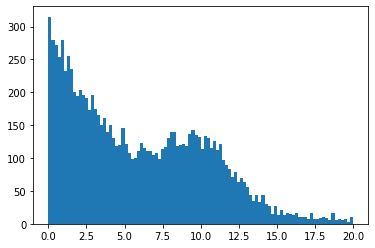

In [ ]:
plt.hist(data,bins=100)

In [ ]:
hist = np.histogram(data, bins=np.linspace(0,20,100))
print(hist)
bin_content, bin_edges = hist[0], hist[1]

(array([320, 279, 273, 257, 289, 237, 254, 235, 205, 191, 204, 197, 194,
       174, 203, 169, 158, 168, 152, 140, 146, 130, 117, 135, 128, 127,
       116,  90, 103, 115, 113, 132, 105, 109, 115,  98, 111, 124, 127,
       112, 151, 135, 120, 116, 129, 130, 134, 136, 145, 120, 130, 125,
       129, 113, 121, 124, 105,  84, 101,  74,  74,  73,  57,  77,  53,
        55,  37,  45,  33,  42,  26,  33,  19,  24,  17,  17,  18,  16,
        16,  13,  16,  12,  11,   9,   9,  18,   8,   7,  10,  11,   8,
         7,  16,   6,   7,   6,   8,   2,  10]), array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
        1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
        2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
        3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
        4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
        5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
        6.0606

In [ ]:
from scipy.stats import norm, expon

In [ ]:
norm.cdf(np.linspace(-5,5,20),0,1)

array([2.86651572e-07, 3.84416316e-06, 3.95074589e-05, 3.11896295e-04,
       1.89738258e-03, 8.93209626e-03, 3.27298770e-02, 9.41223566e-02,
       2.14917602e-01, 3.96214441e-01, 6.03785559e-01, 7.85082398e-01,
       9.05877643e-01, 9.67270123e-01, 9.91067904e-01, 9.98102617e-01,
       9.99688104e-01, 9.99960493e-01, 9.99996156e-01, 9.99999713e-01])

In [ ]:
def mod_total (bin_edges, N_signal, mu, sigma, N_background, tau):
    return N_signal * norm.cdf (bin_edges, mu, sigma) + \
            N_background * expon.cdf (bin_edges, 0, tau )

In [ ]:
from iminuit.cost import ExtendedBinnedNLL
my_cost_func = ExtendedBinnedNLL (bin_content, bin_edges, mod_total)

In [ ]:
from iminuit import Minuit

In [ ]:
N_events = data.size
sample_mean = 1
sample_sigma = 1
my_minuit = Minuit (my_cost_func,
                    N_signal = N_events, mu = sample_mean, sigma = sample_sigma, # signal input parameters
                    N_background = N_events, tau = 1.)                           # background input parameters

In [ ]:
my_minuit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.565e+04 (χ²/ndof = 698.4)│              Nfcn = 541              │
│ EDM = 1.46e+03 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_signal     │   10e3    │   10e3    │            │            │         │         │       │
│ 1 │ mu           │  -1.574   │   0.007   │            │            │         │         │       │
│ 2 │ sigma        │   1.00    │   0.35    │            │            │         │         │       │
│ 3 │ N_background │ 10.000e3  │  0.013e3  │            │            │         │         │       │
│ 4 │ tau          │  1.0000   │  0.0004   │            │            │         │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬──────────────────────────────────────────────────────────────────┐
│              │     N_signal           mu        sigma N_background          tau │
├──────────────┼──────────────────────────────────────────────────────────────────┤
│     N_signal │     9.94e+07    -65.22348   -3.51156e3       8.59e3  49.38163e-3 │
│           mu │    -65.22348     5.52e-05      2.30e-3     -5.66e-3     -0.03e-6 │
│        sigma │   -3.51156e3      2.30e-3        0.124        -0.31     -1.74e-6 │
│ N_background │       8.59e3     -5.66e-3        -0.31          175      4.11e-6 │
│          tau │  49.38163e-3     -0.03e-6     -1.74e-6      4.11e-6     1.57e-07 │
└──────────────┴──────────────────────────────────────────────────────────────────┘

In [ ]:
print(my_minuit.valid)

False


In [ ]:
my_minuit.values['mu']=10
my_minuit.values['sigma']=3
my_minuit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 89.67 (χ²/ndof = 1.0)      │              Nfcn = 776              │
│ EDM = 1.43e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_signal     │  2.32e3   │  0.11e3   │            │            │         │         │       │
│ 1 │ mu           │   9.96    │   0.08    │            │            │         │         │       │
│ 2 │ sigma        │   2.10    │   0.08    │            │            │         │         │       │
│ 3 │ N_background │  7.84e3   │  0.14e3   │            │            │         │         │       │
│ 4 │ tau          │   5.10    │   0.11    │            │            │         │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬──────────────────────────────────────────────────────────────────┐
│              │     N_signal           mu        sigma N_background          tau │
├──────────────┼──────────────────────────────────────────────────────────────────┤
│     N_signal │     1.19e+04       -2.905        5.990     -0.011e6       -8.375 │
│           mu │       -2.905      0.00627       -0.002        3.083        0.001 │
│        sigma │        5.990       -0.002      0.00687       -6.712       -0.005 │
│ N_background │     -0.011e6        3.083       -6.712     2.03e+04       10.123 │
│          tau │       -8.375        0.001       -0.005       10.123       0.0129 │
└──────────────┴──────────────────────────────────────────────────────────────────┘

In [ ]:
N_events = data.size
sample_mean = 1
sample_sigma = 1
my_minuit = Minuit (my_cost_func,
                    N_signal = N_events, mu = sample_mean, sigma = sample_sigma, # signal input parameters
                    N_background = N_events, tau = 1.)                           # background input parameters
my_minuit.limits['N_signal', 'N_background', 'sigma', 'tau'] = (0, None)
my_minuit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 89.67 (χ²/ndof = 1.0)      │              Nfcn = 753              │
│ EDM = 0.000112 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_signal     │  2.32e3   │  0.11e3   │            │            │    0    │         │       │
│ 1 │ mu           │   9.96    │   0.08    │            │            │         │         │       │
│ 2 │ sigma        │   2.10    │   0.08    │            │            │    0    │         │       │
│ 3 │ N_background │  7.84e3   │  0.14e3   │            │            │    0    │         │       │
│ 4 │ tau          │   5.10    │   0.11    │            │            │    0    │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬──────────────────────────────────────────────────────────────────┐
│              │     N_signal           mu        sigma N_background          tau │
├──────────────┼──────────────────────────────────────────────────────────────────┤
│     N_signal │     1.19e+04       -2.904        5.990     -0.011e6       -8.378 │
│           mu │       -2.904      0.00627       -0.002        3.083        0.001 │
│        sigma │        5.990       -0.002      0.00687       -6.714       -0.005 │
│ N_background │     -0.011e6        3.083       -6.714     2.03e+04       10.127 │
│          tau │       -8.378        0.001       -0.005       10.127       0.0129 │
└──────────────┴──────────────────────────────────────────────────────────────────┘

In [ ]:
sample_mean = np.mean (data)
# and, when initializing the Minuit object:
N_events = data.size
sample_sigma = 1
my_minuit = Minuit (my_cost_func,
                    N_signal = N_events, mu = sample_mean, sigma = sample_sigma, # signal input parameters
                    N_background = N_events, tau = 1.)                           # background input parameters
my_minuit.limits['N_signal', 'N_background', 'sigma', 'tau'] = (0, None)
my_minuit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 89.67 (χ²/ndof = 1.0)      │              Nfcn = 329              │
│ EDM = 2.06e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_signal     │  2.32e3   │  0.11e3   │            │            │    0    │         │       │
│ 1 │ mu           │   9.96    │   0.08    │            │            │         │         │       │
│ 2 │ sigma        │   2.10    │   0.08    │            │            │    0    │         │       │
│ 3 │ N_background │  7.84e3   │  0.14e3   │            │            │    0    │         │       │
│ 4 │ tau          │   5.10    │   0.11    │            │            │    0    │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬──────────────────────────────────────────────────────────────────┐
│              │     N_signal           mu        sigma N_background          tau │
├──────────────┼──────────────────────────────────────────────────────────────────┤
│     N_signal │     1.19e+04       -2.905        5.991     -0.011e6       -8.376 │
│           mu │       -2.905      0.00627       -0.002        3.084        0.001 │
│        sigma │        5.991       -0.002      0.00687       -6.713       -0.005 │
│ N_background │     -0.011e6        3.084       -6.713     2.03e+04       10.122 │
│          tau │       -8.376        0.001       -0.005       10.122       0.0129 │
└──────────────┴──────────────────────────────────────────────────────────────────┘

In [ ]:
sample_sigma = np.std (data)
# and, when initializing the Minuit object:
sigma = sample_sigma
sample_mean = np.mean (data)
# and, when initializing the Minuit object:
N_events = data.size
my_minuit = Minuit (my_cost_func,
                    N_signal = N_events, mu = sample_mean, sigma = sample_sigma, # signal input parameters
                    N_background = N_events, tau = 1.)                           # background input parameters
my_minuit.limits['N_signal', 'N_background', 'sigma', 'tau'] = (0, None)
my_minuit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 89.67 (χ²/ndof = 1.0)      │              Nfcn = 260              │
│ EDM = 9.4e-07 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_signal     │  2.32e3   │  0.11e3   │            │            │    0    │         │       │
│ 1 │ mu           │   9.96    │   0.08    │            │            │         │         │       │
│ 2 │ sigma        │   2.10    │   0.08    │            │            │    0    │         │       │
│ 3 │ N_background │  7.84e3   │  0.14e3   │            │            │    0    │         │       │
│ 4 │ tau          │   5.10    │   0.11    │            │            │    0    │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬──────────────────────────────────────────────────────────────────┐
│              │     N_signal           mu        sigma N_background          tau │
├──────────────┼──────────────────────────────────────────────────────────────────┤
│     N_signal │      1.2e+04       -2.907        6.021     -0.011e6       -8.288 │
│           mu │       -2.907      0.00664       -0.003        3.243        0.001 │
│        sigma │        6.021       -0.003      0.00692       -6.681       -0.005 │
│ N_background │     -0.011e6        3.243       -6.681     2.06e+04       10.300 │
│          tau │       -8.288        0.001       -0.005       10.300        0.013 │
└──────────────┴──────────────────────────────────────────────────────────────────┘

## Fitting with Range

In [ ]:
N_events = data.size
sample_mean = 1
sample_sigma = 1
my_minuit = Minuit (my_cost_func,
                    N_signal = N_events, mu = sample_mean, sigma = sample_sigma, # signal input parameters
                    N_background = N_events, tau = 1.)                           # background input parameters

# setting the signal to zero for a first background-only preliminary fit
my_minuit.values["N_signal"] = 0
# fixing the value of the signal parameters to a constant value
# (i.e. they are not considered in the fit)
my_minuit.fixed["N_signal", "mu", "sigma"] = True

# temporary mask avoiding the signal region
bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
my_cost_func.mask = (bin_centres < 5) | (15 < bin_centres)

my_minuit.migrad ()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 41.41 (χ²/ndof = 0.9)      │              Nfcn = 85               │
│ EDM = 7.18e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_signal     │     0     │   0.1e3   │            │            │         │         │  yes  │
│ 1 │ mu           │   1.00    │   0.01    │            │            │         │         │  yes  │
│ 2 │ sigma        │   1.00    │   0.01    │            │            │         │         │  yes  │
│ 3 │ N_background │  7.97e3   │  0.13e3   │            │            │         │         │       │
│ 4 │ tau          │    5.2    │    0.1    │            │            │         │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬──────────────────────────────────────────────────────────────────┐
│              │     N_signal           mu        sigma N_background          tau │
├──────────────┼──────────────────────────────────────────────────────────────────┤
│     N_signal │            0            0            0            0         0.00 │
│           mu │            0            0            0            0         0.00 │
│        sigma │            0            0            0            0         0.00 │
│ N_background │            0            0            0     1.69e+04        7.054 │
│          tau │         0.00         0.00         0.00        7.054       0.0105 │
└──────────────┴──────────────────────────────────────────────────────────────────┘

In [ ]:
bin_centres = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bkg_mask = (bin_centres < 5) | (15 < bin_centres)
print(bin_centres, bkg_mask)

[ 0.1010101   0.3030303   0.50505051  0.70707071  0.90909091  1.11111111
  1.31313131  1.51515152  1.71717172  1.91919192  2.12121212  2.32323232
  2.52525253  2.72727273  2.92929293  3.13131313  3.33333333  3.53535354
  3.73737374  3.93939394  4.14141414  4.34343434  4.54545455  4.74747475
  4.94949495  5.15151515  5.35353535  5.55555556  5.75757576  5.95959596
  6.16161616  6.36363636  6.56565657  6.76767677  6.96969697  7.17171717
  7.37373737  7.57575758  7.77777778  7.97979798  8.18181818  8.38383838
  8.58585859  8.78787879  8.98989899  9.19191919  9.39393939  9.5959596
  9.7979798  10.         10.2020202  10.4040404  10.60606061 10.80808081
 11.01010101 11.21212121 11.41414141 11.61616162 11.81818182 12.02020202
 12.22222222 12.42424242 12.62626263 12.82828283 13.03030303 13.23232323
 13.43434343 13.63636364 13.83838384 14.04040404 14.24242424 14.44444444
 14.64646465 14.84848485 15.05050505 15.25252525 15.45454545 15.65656566
 15.85858586 16.06060606 16.26262626 16.46464646 16.

In [ ]:
print(bin_content)
print(bin_content[bkg_mask])

[320 279 273 257 289 237 254 235 205 191 204 197 194 174 203 169 158 168
 152 140 146 130 117 135 128 127 116  90 103 115 113 132 105 109 115  98
 111 124 127 112 151 135 120 116 129 130 134 136 145 120 130 125 129 113
 121 124 105  84 101  74  74  73  57  77  53  55  37  45  33  42  26  33
  19  24  17  17  18  16  16  13  16  12  11   9   9  18   8   7  10  11
   8   7  16   6   7   6   8   2  10]
[320 279 273 257 289 237 254 235 205 191 204 197 194 174 203 169 158 168
 152 140 146 130 117 135 128  17  17  18  16  16  13  16  12  11   9   9
  18   8   7  10  11   8   7  16   6   7   6   8   2  10]


In [ ]:
my_cost_func.mask = None # remove mask
my_minuit.fixed = False # release all parameters
my_minuit.fixed["N_background", "tau"] = True # fix background parameters
my_minuit.values["N_signal"] = N_events - my_minuit.values["N_background"] # do not start at the limit
my_minuit.migrad ()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2267 (χ²/ndof = 23.6)      │              Nfcn = 295              │
│ EDM = 3.48e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_signal     │  0.01e6   │  0.07e6   │            │            │         │         │       │
│ 1 │ mu           │   -0.3    │    0.4    │            │            │         │         │       │
│ 2 │ sigma        │   0.10    │   0.13    │            │            │         │         │       │
│ 3 │ N_background │  7.97e3   │  0.13e3   │            │            │         │         │  yes  │
│ 4 │ tau          │    5.2    │    0.1    │            │            │         │         │  yes  │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬──────────────────────────────────────────────────────────────────┐
│              │     N_signal           mu        sigma N_background          tau │
├──────────────┼──────────────────────────────────────────────────────────────────┤
│     N_signal │     4.72e+09  -10.14181e3      169.417          0e9          0e9 │
│           mu │  -10.14181e3        0.178       -0.051         0.00         0.00 │
│        sigma │      169.417       -0.051       0.0168        0.000        0.000 │
│ N_background │          0e9         0.00        0.000            0            0 │
│          tau │          0e9         0.00        0.000            0            0 │
└──────────────┴──────────────────────────────────────────────────────────────────┘

In [ ]:
my_minuit.values["mu"] = 5
my_minuit.values["sigma"] = 2
my_minuit.values["N_signal"] = N_events - my_minuit.values["N_background"]
my_minuit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 90.75 (χ²/ndof = 0.9)      │              Nfcn = 384              │
│ EDM = 2.18e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_signal     │  2.23e3   │  0.07e3   │            │            │         │         │       │
│ 1 │ mu           │   9.98    │   0.08    │            │            │         │         │       │
│ 2 │ sigma        │   2.05    │   0.07    │            │            │         │         │       │
│ 3 │ N_background │  7.97e3   │  0.13e3   │            │            │         │         │  yes  │
│ 4 │ tau          │    5.2    │    0.1    │            │            │         │         │  yes  │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬──────────────────────────────────────────────────────────────────┐
│              │     N_signal           mu        sigma N_background          tau │
├──────────────┼──────────────────────────────────────────────────────────────────┤
│     N_signal │     4.92e+03       -1.403        1.746          0e3          0e3 │
│           mu │       -1.403      0.00578       -0.001        0.000        0.000 │
│        sigma │        1.746       -0.001      0.00423        0.000        0.000 │
│ N_background │          0e3        0.000        0.000            0            0 │
│          tau │          0e3        0.000        0.000            0            0 │
└──────────────┴──────────────────────────────────────────────────────────────────┘

In [ ]:
my_minuit.fixed = False # release all parameters
my_minuit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 89.67 (χ²/ndof = 1.0)      │              Nfcn = 495              │
│ EDM = 1.01e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_signal     │  2.32e3   │  0.11e3   │            │            │         │         │       │
│ 1 │ mu           │   9.96    │   0.08    │            │            │         │         │       │
│ 2 │ sigma        │   2.10    │   0.08    │            │            │         │         │       │
│ 3 │ N_background │  7.84e3   │  0.14e3   │            │            │         │         │       │
│ 4 │ tau          │   5.10    │   0.11    │            │            │         │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────────┬──────────────────────────────────────────────────────────────────┐
│              │     N_signal           mu        sigma N_background          tau │
├──────────────┼──────────────────────────────────────────────────────────────────┤
│     N_signal │     1.19e+04       -2.904        5.989     -0.011e6       -8.375 │
│           mu │       -2.904      0.00627       -0.002        3.083        0.001 │
│        sigma │        5.989       -0.002      0.00687       -6.712       -0.005 │
│ N_background │     -0.011e6        3.083       -6.712     2.03e+04       10.122 │
│          tau │       -8.375        0.001       -0.005       10.122       0.0129 │
└──────────────┴──────────────────────────────────────────────────────────────────┘

In [ ]:
my_minuit.valid

True

In [ ]:
for par, val, err in zip (my_minuit.parameters, my_minuit.values, my_minuit.errors) :
    print(f'{par} = {val:.3f} +/- {err:.3f}') # formatted output


N_signal = 2318.665 +/- 109.254
mu = 9.963 +/- 0.079
sigma = 2.100 +/- 0.083
N_background = 7836.885 +/- 142.412
tau = 5.103 +/- 0.114


In [ ]:
my_minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 89.67 (χ²/ndof = 1.0)      │              Nfcn = 912              │
│ EDM = 1.01e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name         │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_signal     │  2.32e3   │  0.11e3   │  -0.11e3   │   0.11e3   │         │         │       │
│ 1 │ mu           │   9.96    │   0.08    │   -0.08    │    0.08    │         │         │       │
│ 2 │ sigma        │   2.10    │   0.08    │   -0.08    │    0.08    │         │         │       │
│ 3 │ N_background │  7.84e3   │  0.14e3   │  -0.14e3   │   0.14e3   │         │         │       │
│ 4 │ tau          │   5.10    │   0.11    │   -0.11    │    0.11    │         │         │       │
└───┴──────────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │       N_signal        │          mu           │         sigma         │     N_background      │          tau          │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.11e3  │  0.11e3   │   -0.08   │   0.08    │   -0.08   │   0.08    │  -0.14e3  │  0.14e3   │   -0.11   │   0.11    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌──────────────┬──────────────────────────────────────────────────────────────────┐
│              │     N_signal           mu        sigma N_background          tau │
├──────────────┼──────────────────────────────────────────────────────────────────┤
│     N_signal │     1.19e+04       -2.904        5.989     -0.011e6       -8.375 │
│           mu │       -2.904      0.00627       -0.002        3.083        0.001 │
│        sigma │        5.989       -0.002      0.00687       -6.712       -0.005 │
│ N_background │     -0.011e6        3.083       -6.712     2.03e+04       10.122 │
│          tau │       -8.375        0.001       -0.005       10.122       0.0129 │
└──────────────┴──────────────────────────────────────────────────────────────────┘

In [ ]:
for key in my_minuit.parameters : # parameters is a tuple containing the parameter names
    print ('parameter ' + key + ': ' +
           str (my_minuit.values[key]) + ' + ' +
           str (my_minuit.merrors[key].upper) + ' ' +
           str (my_minuit.merrors[key].lower)
          )

parameter N_signal: 2318.6652046971535 + 111.10804954890942 -107.6092866218855
parameter mu: 9.963375917973142 + 0.07874867124812913 -0.07974800455345901
parameter sigma: 2.1004305002363615 + 0.08471103107741164 -0.08123156448782329
parameter N_background: 7836.8845918479365 + 142.17674573027642 -142.8317609021639
parameter tau: 5.1027413274524545 + 0.11412186038608983 -0.11358403402463714


(array([2100.15756277, 2115.22705531, 2130.29654786, 2145.36604041,
        2160.43553295, 2175.5050255 , 2190.57451805, 2205.6440106 ,
        2220.71350314, 2235.78299569, 2250.85248824, 2265.92198078,
        2280.99147333, 2296.06096588, 2311.13045842, 2326.19995097,
        2341.26944352, 2356.33893606, 2371.40842861, 2386.47792116,
        2401.54741371, 2416.61690625, 2431.6863988 , 2446.75589135,
        2461.82538389, 2476.89487644, 2491.96436899, 2507.03386153,
        2522.10335408, 2537.17284663]),
 array([4.24984480e+00, 3.66769635e+00, 3.13047505e+00, 2.63765868e+00,
        2.18872726e+00, 1.78316288e+00, 1.42044960e+00, 1.10007331e+00,
        8.21521558e-01, 5.84446576e-01, 3.87922556e-01, 2.31738537e-01,
        1.15370393e-01, 3.82993687e-02, 1.19951792e-05, 0.00000000e+00,
        3.77602281e-02, 1.12794566e-01, 2.24609869e-01, 3.72717899e-01,
        5.56635256e-01, 7.75548529e-01, 1.02939498e+00, 1.31750184e+00,
        1.63936808e+00, 1.99449252e+00, 2.38237373e+

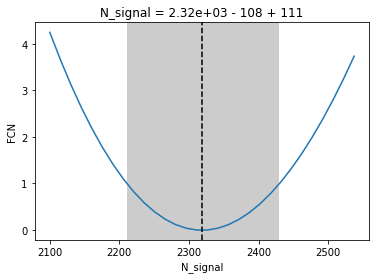

In [ ]:
my_minuit.draw_mnprofile('N_signal')

(array([7552.06083288, 7571.70385074, 7591.3468686 , 7610.98988646,
        7630.63290432, 7650.27592218, 7669.91894004, 7689.5619579 ,
        7709.20497576, 7728.84799362, 7748.49101148, 7768.13402934,
        7787.7770472 , 7807.42006506, 7827.06308292, 7846.70610078,
        7866.34911864, 7885.9921365 , 7905.63515436, 7925.27817222,
        7944.92119008, 7964.56420794, 7984.2072258 , 8003.85024366,
        8023.49326151, 8043.13627937, 8062.77929723, 8082.42231509,
        8102.06533295, 8121.70835081]),
 array([3.94183190e+00, 3.42016274e+00, 2.93481412e+00, 2.48597216e+00,
        2.07380451e+00, 1.69846986e+00, 1.36011820e+00, 1.05889113e+00,
        7.95062057e-01, 5.68408166e-01, 3.79285372e-01, 2.27794495e-01,
        1.14031540e-01, 3.80877894e-02, 4.99011439e-05, 0.00000000e+00,
        3.80157714e-02, 1.14170552e-01, 2.28533420e-01, 3.81169284e-01,
        5.72138969e-01, 8.01499303e-01, 1.06930320e+00, 1.37529498e+00,
        1.71996369e+00, 2.10315395e+00, 2.52489256e+

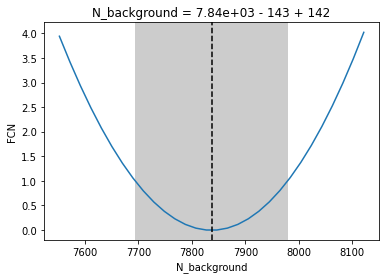

In [ ]:
my_minuit.draw_mnprofile('N_background')

(array([2100.15756277, 2109.07624203, 2117.99492129, 2126.91360055,
        2135.83227982, 2144.75095908, 2153.66963834, 2162.5883176 ,
        2171.50699687, 2180.42567613, 2189.34435539, 2198.26303465,
        2207.18171392, 2216.10039318, 2225.01907244, 2233.9377517 ,
        2242.85643097, 2251.77511023, 2260.69378949, 2269.61246875,
        2278.53114802, 2287.44982728, 2296.36850654, 2305.2871858 ,
        2314.20586507, 2323.12454433, 2332.04322359, 2340.96190285,
        2349.88058212, 2358.79926138, 2367.71794064, 2376.6366199 ,
        2385.55529917, 2394.47397843, 2403.39265769, 2412.31133695,
        2421.23001622, 2430.14869548, 2439.06737474, 2447.986054  ,
        2456.90473327, 2465.82341253, 2474.74209179, 2483.66077105,
        2492.57945032, 2501.49812958, 2510.41680884, 2519.3354881 ,
        2528.25416737, 2537.17284663]),
 array([7552.06083288, 7563.68629243, 7575.31175198, 7586.93721153,
        7598.56267108, 7610.18813063, 7621.81359018, 7633.43904973,
        

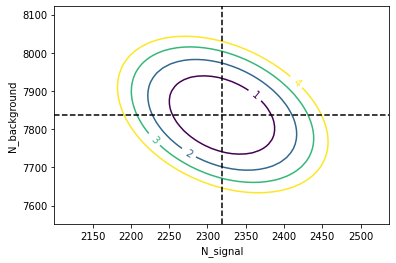

In [ ]:
my_minuit.draw_contour('N_signal','N_background')

(array([4.8752057 , 4.88449287, 4.89378004, 4.90306721, 4.91235438,
        4.92164155, 4.93092871, 4.94021588, 4.94950305, 4.95879022,
        4.96807739, 4.97736456, 4.98665172, 4.99593889, 5.00522606,
        5.01451323, 5.0238004 , 5.03308757, 5.04237473, 5.0516619 ,
        5.06094907, 5.07023624, 5.07952341, 5.08881058, 5.09809774,
        5.10738491, 5.11667208, 5.12595925, 5.13524642, 5.14453358,
        5.15382075, 5.16310792, 5.17239509, 5.18168226, 5.19096943,
        5.20025659, 5.20954376, 5.21883093, 5.2281181 , 5.23740527,
        5.24669244, 5.2559796 , 5.26526677, 5.27455394, 5.28384111,
        5.29312828, 5.30241545, 5.31170261, 5.32098978, 5.33027695]),
 array([ 9.80496663,  9.81143232,  9.817898  ,  9.82436369,  9.83082937,
         9.83729506,  9.84376074,  9.85022643,  9.85669211,  9.8631578 ,
         9.86962348,  9.87608917,  9.88255485,  9.88902054,  9.89548622,
         9.90195191,  9.90841759,  9.91488328,  9.92134896,  9.92781465,
         9.93428033,  9.94

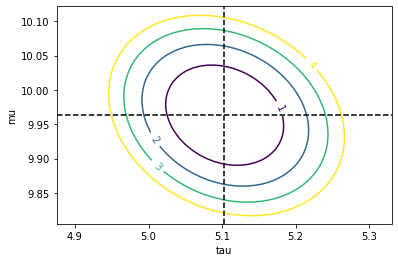

In [ ]:
my_minuit.draw_contour('tau','mu')

## Unbinned ML Fits


In [ ]:
def mod_unb (x, f_signal, mu, sigma, tau) :
    return f_signal * norm.pdf(x, mu, sigma) + (1- f_signal) * expon.pdf (x, 0, tau )

In [ ]:
from iminuit.cost import UnbinnedNLL
my_cost_func_unb = UnbinnedNLL (data, mod_unb)

In [ ]:
f_sig = 0.5
sample_mean = 1
sample_sigma = 1
my_minuit = Minuit (my_cost_func_unb,
                    f_signal = f_sig, mu = sample_mean, sigma = sample_sigma, # signal input parameters
                    tau = 1.)                           # background input parameters

# setting the signal to zero for a first background-only preliminary fit
#my_minuit.values["N_signal"] = 0
# fixing the value of the signal parameters to a constant value
# (i.e. they are not considered in the fit)
my_minuit.limits["f_signal"] = (0,1)
my_minuit.limits['sigma','tau'] = (0,None)

my_minuit.migrad ()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.387e+04                  │              Nfcn = 214              │
│ EDM = 4.85e-05 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name     │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ f_signal │   0.334   │   0.017   │            │            │    0    │    1    │       │
│ 1 │ mu       │   9.71    │   0.10    │            │            │         │         │       │
│ 2 │ sigma    │   2.78    │   0.12    │            │            │    0    │         │       │
│ 3 │ tau      │   4.01    │   0.12    │            │            │    0    │         │       │
└───┴──────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬─────────────────────────────────────┐
│          │ f_signal       mu    sigma      tau │
├──────────┼─────────────────────────────────────┤
│ f_signal │ 0.000271 -1.00e-3  1.75e-3 -1.63e-3 │
│       mu │ -1.00e-3  0.00924   -0.008    0.005 │
│    sigma │  1.75e-3   -0.008   0.0157   -0.011 │
│      tau │ -1.63e-3    0.005   -0.011   0.0138 │
└──────────┴─────────────────────────────────────┘

## Least Squares

In [ ]:
def mod_ls (x, N_events, f_signal, mu, sigma, tau, bin_width) :
    return N_events * (f_signal * norm.pdf(x, mu, sigma) + (1- f_signal) * expon.pdf (x, 0, tau ) ) * bin_width

In [ ]:
from iminuit.cost import LeastSquares
my_cost_func_ls = LeastSquares (bin_centres, bin_content, np.sqrt(bin_content), mod_ls)

In [ ]:
N_total = data.size
f_sig = 0.5
sample_mean = 1
sample_sigma = 1
my_minuit = Minuit (my_cost_func_ls,
                    N_events = data.size, bin_width = bin_centres[1]-bin_centres[0],
                    f_signal = f_sig, mu = sample_mean, sigma = sample_sigma, # signal input parameters
                    tau = 1.)                           # background input parameters
my_minuit.fixed['N_events','bin_width']

# setting the signal to zero for a first background-only preliminary fit
#my_minuit.values["N_signal"] = 0
# fixing the value of the signal parameters to a constant value
# (i.e. they are not considered in the fit)
my_minuit.limits["f_signal"] = (0,1)
my_minuit.limits['sigma','tau'] = (0,None)

my_minuit.migrad ()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 89.11 (χ²/ndof = 1.0)      │              Nfcn = 359              │
│ EDM = 2.78e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name      │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N_events  │  10.02e3  │  0.07e3   │            │            │         │         │       │
│ 1 │ f_signal  │   0.239   │   0.012   │            │            │    0    │    1    │       │
│ 2 │ mu        │   9.94    │   0.08    │            │            │         │         │       │
│ 3 │ sigma     │   2.14    │   0.09    │            │            │    0    │         │       │
│ 4 │ tau       │   4.94    │   0.12    │            │            │    0    │         │       │
│ 5 │ bin_width │  0.2025   │  0.0014   │            │            │         │         │       │
└───┴───────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────────┬─────────────────────────────────────────────────────────────┐
│           │  N_events  f_signal        mu     sigma       tau bin_width │
├───────────┼─────────────────────────────────────────────────────────────┤
│  N_events │  4.75e+03 -52.12e-3     0.070    -0.302     0.651 8.9668e-3 │
│  f_signal │ -52.12e-3  0.000133  -0.36e-3   0.72e-3  -0.94e-3   -1.1e-6 │
│        mu │     0.070  -0.36e-3    0.0064    -0.003     0.001    1.4e-6 │
│     sigma │    -0.302   0.72e-3    -0.003   0.00772    -0.005   -6.1e-6 │
│       tau │     0.651  -0.94e-3     0.001    -0.005    0.0134   13.2e-6 │
│ bin_width │ 8.9668e-3   -1.1e-6    1.4e-6   -6.1e-6   13.2e-6  1.94e-06 │
└───────────┴─────────────────────────────────────────────────────────────┘

In [ ]:
my_minuit.fval

89.10541857407748